<a href="https://colab.research.google.com/github/Ryo-Tanohata/sig_beginner9/blob/main/PyCaret_nightry_beginner9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://openstandia.jp/oss_info/pycaret/

#データの取得

In [1]:
#signate_begginer9.zipをGoogle Drive からひっぱってくるやつ
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
 
auth.authenticate_user()
 
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate_begginer9.zip'", fields="files(id)").execute()
signate_api_key = results.get('files', [])
 
filename = "/content/input/signate_begginer9.zip"
os.makedirs(os.path.dirname(filename), exist_ok=True)
 
request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [2]:
import os
path="./input"
zip_files=os.listdir(path)
zip_files

['signate_begginer9.zip']

In [3]:
import zipfile
for i in zip_files:
    if ".zip" in i:
        with zipfile.ZipFile("input/"+i) as existing_zip:
            print(f'open {i}')
            existing_zip.extractall('input')
            print("extract")
    else:
        continue

open signate_begginer9.zip
extract


In [4]:
import os
datapath=[]
for dirname, dirpaths, filenames in os.walk('input'):
    for filename in filenames:
        datapath.append(dirname+'/'+filename)
datapath

['input/test.csv',
 'input/train.csv',
 'input/signate_begginer9.zip',
 'input/sample_submission.csv']

In [5]:
import pandas as pd
databox={}
for i in datapath:
    if '.tsv' in i:
        data={i.split('/')[1].split('.')[0]:pd.read_csv(i, sep='\t', index_col=0)}
    elif  ('train' in i) or ('test' in i):
        data={i.split('/')[1].split('.')[0]:pd.read_csv(i)}
    elif '.csv' in i:
        data={i.split('/')[1].split('.')[0]:pd.read_csv(i, header=None)}
    databox.update(data)
databox.keys()

dict_keys(['test', 'train', 'sample_submission'])

#PyCret

In [6]:
pip install -q pycaret-nightly

     |████████████████████████████████| 266kB 19.7MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 14.2MB 353kB/s 
     |████████████████████████████████| 112kB 46.4MB/s 
     |████████████████████████████████| 1.4MB 42.7MB/s 
     |████████████████████████████████| 245kB 45.8MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 6.8MB 36.2MB/s 
     |████████████████████████████████| 2.0MB 37.0MB/s 
     |████████████████████████████████| 174kB 62.9MB/s 
     |████████████████████████████████| 1.7MB 55.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 276kB 48.8MB/s 
     |████████████████████████████████| 1.2MB 44.3MB/s 
     |████████████████████████████████| 153kB 47.6MB/s 
     |████████████████████████████████| 61kB 7.1MB/

In [ ]:
pip install -q pycaret

     |████████████████████████████████| 266kB 5.6MB/s 
     |████████████████████████████████| 6.8MB 11.1MB/s 
     |████████████████████████████████| 245kB 41.5MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 215kB 37.9MB/s 
     |████████████████████████████████| 2.0MB 39.4MB/s 
     |████████████████████████████████| 112kB 46.2MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 1.7MB 38.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.2MB 50.7MB/s 
     |████████████████████████████████| 276kB 54.7MB/s 
     |████████████████████████████████| 1.1MB 38.4MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 3.2MB 32.3MB/s 

In [7]:
train=databox['train']
test=databox['test']
sub=databox['sample_submission']

In [ ]:
train.head()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10,1
1,3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187,1
2,7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29,1
3,11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43,0
4,12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213,0


In [10]:
from pycaret.classification import *
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, KMeansSMOTE, RandomOverSampler, SMOTE, SMOTENC, SVMSMOTE
exp1 = setup(
    train, 
    target = 'target',
    fix_imbalance=True,
    fix_imbalance_method=ADASYN() # この行で指定
)

,Description,Value
0,session_id,376
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1000, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


関数setup()にこのデータセットと目的変数のラベル名を与えると、データ型の推定と変換や欠損値の補填、カテゴリー変数のエンコーディングなどを自動的に行います。

In [ ]:
from pycaret.classification import *
setup(data = train, target = 'target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1000, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


(False,
 StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
 [],
 10,
 <MLUsecase.CLASSIFICATION: 1>,
 131    0
 203    1
 50     0
 585    0
 138    1
       ..
 598    1
 458    0
 586    0
 178    0
 498    0
 Name: target, Length: 301, dtype: int64,
 False,
 {'Bagging': <pycaret.containers.models.classification.BaggingClassifierContainer at 0x7fae2e0f7c90>,
  'CalibratedCV': <pycaret.containers.models.classification.CalibratedClassifierCVContainer at 0x7fae2586fd10>,
  'Stacking': <pycaret.containers.models.classification.StackingClassifierContainer at 0x7fae2e115190>,
  'Voting': <pycaret.containers.models.classification.VotingClassifierContainer at 0x7fae2e0ff450>,
  'ada': <pycaret.containers.models.classification.AdaBoostClassifierContainer at 0x7fae2e1153d0>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x7fae2e0fd6d0>,
  'et': <pycaret.containers.models.classification.ExtraTreesClassifierContainer at 0x7fae2e0f7fd0>,
  'gbc

そして、このようにデータの行数、特徴量の数、訓練データとテストデータの件数などを表示します。

関数compare_models()を呼び出すと、すべてのモデルを比較して、それぞれの精度を高い順に表示します。

In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8355,0.8458,0.4885,0.6023,0.5375,0.4389,0.4436,0.166
et,Extra Trees Classifier,0.8212,0.8235,0.3890,0.5636,0.4564,0.3553,0.3655,0.478
rf,Random Forest Classifier,0.8198,0.8367,0.3527,0.6084,0.4261,0.3306,0.3552,0.541
gbc,Gradient Boosting Classifier,0.8198,0.8190,0.4396,0.5566,0.4860,0.3796,0.3863,0.256
ada,Ada Boost Classifier,0.8012,0.7897,0.4297,0.4988,0.4602,0.3395,0.3417,0.140
dt,Decision Tree Classifier,0.7826,0.6561,0.4473,0.4477,0.4404,0.3073,0.3110,0.028
nb,Naive Bayes,0.7240,0.6876,0.4962,0.3567,0.4130,0.2398,0.2465,0.023
lda,Linear Discriminant Analysis,0.7083,0.7351,0.6016,0.3543,0.4439,0.2636,0.2831,0.026
ridge,Ridge Classifier,0.7040,0.0000,0.5725,0.3460,0.4299,0.2463,0.2620,0.023
lr,Logistic Regression,0.6353,0.6496,0.5038,0.2743,0.3514,0.1314,0.1445,0.319


この関数は、モデルライブラリー内のすべてのモデルを学習し、メトリック評価のための層化交差検証を使用してそれらをスコアリングします。 出力は、学習時間とともに、精度、AUC、再現率、適合率、F1、Kappa、およびMCCを出力します。ここでは、LDAが最も高い精度を出したので、変数best_modelにはLDAのモデルオブジェクトが代入されます。

ハイパーパラメーターをチューニングするには、関数tune_model()を使用します。

In [13]:
lightgbm = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8143,0.8259,0.5000,0.5385,0.5185,0.4037,0.4041
1,0.8143,0.8237,0.4286,0.5455,0.4800,0.3689,0.3729
2,0.8643,0.8296,0.5556,0.6818,0.6122,0.5310,0.5351
3,0.8714,0.8492,0.5556,0.7143,0.6250,0.5489,0.5552
4,0.8417,0.8661,0.4815,0.6190,0.5417,0.4478,0.4530
Mean,0.8412,0.8389,0.5042,0.6198,0.5555,0.4601,0.4641
SD,0.0241,0.0163,0.0480,0.0706,0.0553,0.0701,0.0712


In [15]:
tuned_lightgbm = tune_model(lightgbm, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8143,0.8437,0.4643,0.5417,0.5000,0.3868,0.3885
1,0.7786,0.7832,0.3929,0.4400,0.4151,0.2791,0.2798
2,0.8571,0.8253,0.4815,0.6842,0.5652,0.4828,0.4935
3,0.8214,0.8033,0.4074,0.5500,0.4681,0.3636,0.3696
4,0.8129,0.8360,0.5185,0.5185,0.5185,0.4024,0.4024
Mean,0.8169,0.8183,0.4529,0.5469,0.4934,0.3830,0.3868
SD,0.0250,0.0222,0.0467,0.0789,0.0502,0.0656,0.0684


この関数は、ランダムグリッドサーチを使用してモデルのハイパーパラメーターを自動的に調整します。出力は、モデルの最高の精度、AUC、再現率、適合率、F1、kappa、およびMCCを出力します。

PyCaretは主要なグラフの表示も簡単にできます。例えば、ROC曲線は以下のようなコードで表示できます。

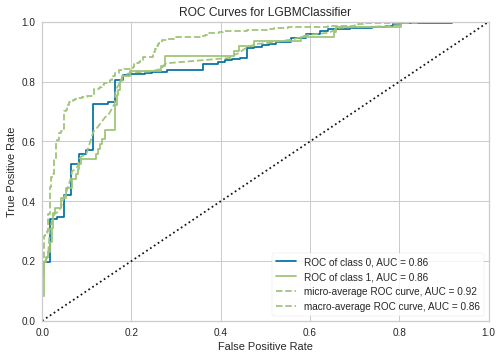

In [16]:
plot_model(tuned_lightgbm, plot = 'auc')

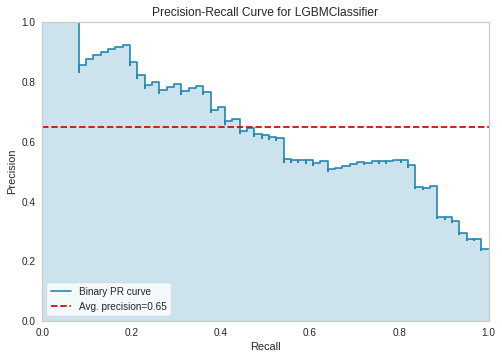

In [17]:
plot_model(tuned_lightgbm, plot = 'pr')

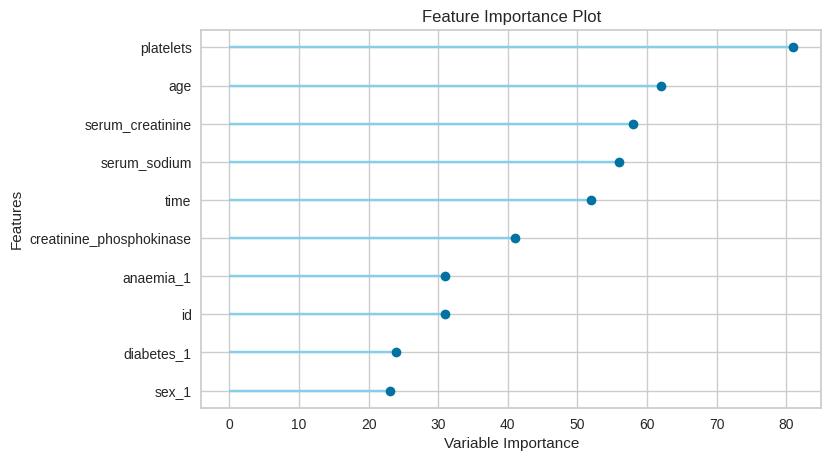

In [18]:
plot_model(tuned_lightgbm, plot='feature')

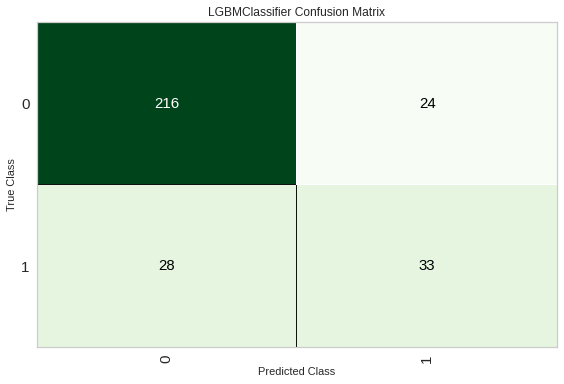

In [19]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [20]:
tuned_lightgbm_predict = predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8272,0.8592,0.541,0.5789,0.5593,0.452,0.4524


In [21]:
predictions = predict_model(tuned_lightgbm, data=test)

In [22]:
predictions

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Label,Score
0,1,67,1,56,0,60,0,255844.0310,0.824480,140,0,0,147,0,0.9000
1,2,58,0,320,0,38,0,163434.8513,5.281481,134,0,0,207,1,0.6960
2,4,67,1,737,0,60,0,255278.8436,0.841388,140,0,0,113,0,0.7665
3,5,48,0,231,1,60,0,500149.7955,0.742807,139,1,1,215,0,0.9686
4,6,59,0,320,0,35,0,245489.2530,1.082861,132,1,0,215,0,0.9148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1992,52,1,582,0,45,1,272303.4409,0.840646,136,1,0,209,0,0.9063
996,1993,51,0,130,1,35,0,270252.4419,0.858651,136,0,0,186,0,0.9641
997,1995,59,0,132,0,38,0,271631.9731,0.880883,141,1,0,33,0,0.8131
998,1997,61,0,582,0,60,0,265879.0010,0.932744,139,1,0,207,0,0.9206
